In [29]:
import sympy as sp
import numpy as np
import keras
X=np.loadtxt('/home/djc6w/S20-team4-project/src/train.csv', delimiter = ',')
X=X.astype('float32')
Y=np.loadtxt('/home/djc6w/S20-team4-project/src/test.csv', delimiter = ',')
Y=Y.astype('float32')

In [30]:
print(X.shape)
print(Y.shape)

(495, 81)
(495, 81)


In [31]:
x_train = np.zeros((X.shape[0],9,9,1))
for i in range(X.shape[0]):
    x_train[i,:,:,0] = X[i].reshape(9,9)
y_train = Y

In [32]:
display(x_train.shape)
display(y_train.shape)

(495, 9, 9, 1)

(495, 81)

In [44]:
display(sp.Matrix(x_train[8,:,:,0]))
display(sp.Matrix(y_train[8].reshape(9,9)))
x_train.shape

Matrix([
[               0.0,                0.0, -0.100000001490116, -0.100000001490116, -0.100000001490116,                0.0,                0.0, -0.100000001490116, -0.100000001490116],
[               0.0, -0.100000001490116, -0.200000002980232,                1.0, -0.100000001490116,                0.0,                0.0, -0.100000001490116,                1.0],
[-0.100000001490116, -0.200000002980232,                1.0, -0.200000002980232, -0.100000001490116,                0.0,                0.0, -0.100000001490116, -0.100000001490116],
[-0.100000001490116,                1.0, -0.200000002980232, -0.100000001490116,                0.0,                0.0,                0.0,                0.0,                0.0],
[-0.100000001490116, -0.100000001490116, -0.100000001490116,                0.0,                0.0,                0.0,                0.0,                0.0,                0.0],
[-0.100000001490116,                1.0, -0.200000002980232, -0.200000002980232, 

Matrix([
[ 0.0,  0.0, -0.1, -0.1, -0.1,  0.0,  0.0, -0.1, -0.1],
[ 0.0, -0.1, -0.2, -1.0, -0.1,  0.0,  0.0, -0.1, -1.0],
[-0.1, -0.2, -1.0, -0.2, -0.1,  0.0,  0.0, -0.1, -0.1],
[-0.1, -1.0, -0.2, -0.1,  0.0,  0.0,  0.0,  0.0,  0.0],
[-0.1, -0.1, -0.1,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[-0.1, -0.2, -0.2, -0.2, -0.2, -0.1, -0.1,  0.0,  0.0],
[-1.0, -0.3, -1.0, -1.0, -0.3, -1.0, -0.1,  0.0,  0.0],
[-0.2, -1.0, -0.4, -1.0, -0.3, -0.1, -0.1,  0.0,  0.0],
[-0.1, -0.1, -0.2, -0.1, -0.1,  0.0,  0.0,  0.0,  0.0]])

(495, 9, 9, 1)

In [47]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(12, kernel_size=(5,5),
                              activation = 'relu',
                              data_format='channels_last',
                              input_shape=[x_train.shape[1],
                                          x_train.shape[2],
                                          x_train.shape[3]]))
model.add(keras.layers.Conv2D(3,(3,3),activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(162,activation='relu'))
model.add(keras.layers.Dense(81, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 5, 5, 12)          312       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 3)           327       
_________________________________________________________________
flatten_8 (Flatten)          (None, 27)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 162)               4536      
_________________________________________________________________
dense_16 (Dense)             (None, 81)                13203     
Total params: 18,378
Trainable params: 18,378
Non-trainable params: 0
_________________________________________________________________


In [48]:
batch_size = 5
epochs = 5
history = model.fit(x_train,y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1)

Epoch 1/5
495/495 [==============================] - 2s 3ms/step - loss: 0.6785 - accuracy: 0.2166
Epoch 2/5
495/495 [==============================] - 1s 2ms/step - loss: 0.6459 - accuracy: 0.2528
Epoch 3/5
495/495 [==============================] - 1s 2ms/step - loss: 0.5545 - accuracy: 0.2850
Epoch 4/5
495/495 [==============================] - 1s 2ms/step - loss: 0.1197 - accuracy: 0.3239
Epoch 5/5
495/495 [==============================] - 1s 2ms/step - loss: -6.7812 - accuracy: 0.3554


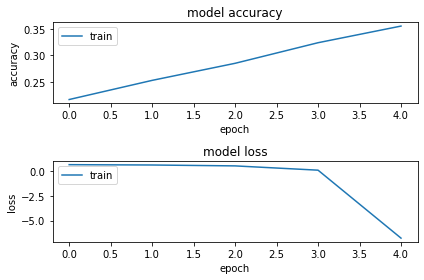

In [49]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(211)

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'], loc='upper left')

plt.tight_layout()
plt.show()

In [51]:
preds = model.predict(x_train[:,:,:,:]).astype("float32")
print(preds)
display(sp.Matrix(y_train[8].reshape(9,9)))

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2654946e-36
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 4.2248170e-36 0.0000000e+00 ... 2.0679419e-32
  1.9271308e-38 0.0000000e+00]]


Matrix([
[ 0.0,  0.0, -0.1, -0.1, -0.1,  0.0,  0.0, -0.1, -0.1],
[ 0.0, -0.1, -0.2, -1.0, -0.1,  0.0,  0.0, -0.1, -1.0],
[-0.1, -0.2, -1.0, -0.2, -0.1,  0.0,  0.0, -0.1, -0.1],
[-0.1, -1.0, -0.2, -0.1,  0.0,  0.0,  0.0,  0.0,  0.0],
[-0.1, -0.1, -0.1,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[-0.1, -0.2, -0.2, -0.2, -0.2, -0.1, -0.1,  0.0,  0.0],
[-1.0, -0.3, -1.0, -1.0, -0.3, -1.0, -0.1,  0.0,  0.0],
[-0.2, -1.0, -0.4, -1.0, -0.3, -0.1, -0.1,  0.0,  0.0],
[-0.1, -0.1, -0.2, -0.1, -0.1,  0.0,  0.0,  0.0,  0.0]])